<a href="https://colab.research.google.com/github/bodnargabor86/advanced_regression/blob/main/Advanced_regression_Gabor_BODNAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Goal: predict the number of rented bikes aggregated by hour.**

The project is based on the following publication and data:

Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

https://drive.google.com/file/d/1J-mR4oxVXQv_a6E17QUZR18OX7lHZJ57/view?usp=share_link




# Import

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os


In [ ]:
# Connecting to google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DATA_PATH = '/content/gdrive/MyDrive/Advanced_Regression/hour.csv'  

# the link to my drive: https://drive.google.com/drive/folders/1ZSbcRA48AqQRC-1e8ELEiiqlrgNAeqx6?usp=share_link

In [ ]:
data = pd.read_csv(DATA_PATH, sep=',') 

# 1. EDA

In [ ]:
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [ ]:
data.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [ ]:
stats = data.describe()
stats.loc['var'] = data.var().tolist()
stats.loc['skew'] = data.skew().tolist()
stats.loc['kurt'] = data.kurtosis().tolist()
stats

instant        season            yr          mnth            hr  \
count  1.737900e+04  17379.000000  17379.000000  17379.000000  17379.000000   
mean   8.690000e+03      2.501640      0.502561      6.537775     11.546752   
std    5.017029e+03      1.106918      0.500008      3.438776      6.914405   
min    1.000000e+00      1.000000      0.000000      1.000000      0.000000   
25%    4.345500e+03      2.000000      0.000000      4.000000      6.000000   
50%    8.690000e+03      3.000000      1.000000      7.000000     12.000000   
75%    1.303450e+04      3.000000      1.000000     10.000000     18.000000   
max    1.737900e+04      4.000000      1.000000     12.000000     23.000000   
var    2.517058e+07      1.225268      0.250008     11.825178     47.808998   
skew   0.000000e+00     -0.005416     -0.010243     -0.009253     -0.010680   
kurt  -1.200000e+00     -1.334251     -2.000125     -1.201878     -1.198021   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   
var        0.027944      4.023119      0.216626      0.408777      0.037078   
skew       5.638538     -0.002998     -0.785258      1.228047     -0.006021   
kurt      29.796540     -1.255997     -1.383529      0.350151     -0.941844   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   
var        0.029532      0.037222      0.014967   2430.986021  22909.027999   
skew      -0.090429     -0.111287      0.574905      2.499237      1.557904   
kurt      -0.845412     -0.826117      0.590820      7.571002      2.750018   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000  
var    32901.461104  
skew       1.277412  
kurt       1.417203

In [ ]:
data.corr()

instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.008740 -0.135386  0.137252  0.003988   
casual      0.158295  0.120206  0.142779  0.068457  0.301202  0.031564   
registered  0.282046  0.174226  0.253684  0.122273  0.374141 -0.047345   
cnt         0.278379  0.178056  0.250495  0.120638  0.394071 -0.030927   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant     0.001357   -0.003416   -0.014198  0.136178  0.137615  0.009577   
season     -0.002335    0.013743   -0.014524  0.312025  0.319380  0.150625   
yr         -0.004485   -0.002196   -0.019157  0.040913  0.039222 -0.083546   
mnth        0.010400   -0.003477    0.005400  0.201691  0.208096  0.164411   
hr         -0.003498    0.002285   -0.020203  0.137603  0.133750 -0.276498   
holiday    -0.102088   -0.252471   -0.017036 -0.027340 -0.030973 -0.010588   
weekday     1.000000    0.035955    0.003311 -0.001795 -0.008821 -0.037158   
workingday  0.035955    1.000000    0.044672  0.055390  0.054667  0.015688   
weathersit  0.003311    0.044672    1.000000 -0.102640 -0.105563  0.418130   
temp       -0.001795    0.055390   -0.102640  1.000000  0.987672 -0.069881   
atemp      -0.008821    0.054667   -0.105563  0.987672  1.000000 -0.051918   
hum        -0.037158    0.015688    0.418130 -0.069881 -0.051918  1.000000   
windspeed   0.011502   -0.011830    0.026226 -0.023125 -0.062336 -0.290105   
casual      0.032721   -0.300942   -0.152628  0.459616  0.454080 -0.347028   
registered  0.021578    0.134326   -0.120966  0.335361  0.332559 -0.273933   
cnt         0.026900    0.030284   -0.142426  0.404772  0.400929 -0.322911   

            windspeed    casual  registered       cnt  
instant     -0.074505  0.158295    0.282046  0.278379  
season      -0.149773  0.120206    0.174226  0.178056  
yr          -0.008740  0.142779    0.253684  0.250495  
mnth        -0.135386  0.068457    0.122273  0.120638  
hr           0.137252  0.301202    0.374141  0.394071  
holiday      0.003988  0.031564   -0.047345 -0.030927  
weekday      0.011502  0.032721    0.021578  0.026900  
workingday  -0.011830 -0.300942    0.134326  0.030284  
weathersit   0.026226 -0.152628   -0.120966 -0.142426  
temp        -0.023125  0.459616    0.335361  0.404772  
atemp       -0.062336  0.454080    0.332559  0.400929  
hum         -0.290105 -0.347028   -0.273933 -0.322911  
windspeed    1.000000  0.090287    0.082321  0.093234  
casual       0.090287  1.000000    0.506618  0.694564  
registered   0.082321  0.506618    1.000000  0.972151  
cnt          0.093234  0.694564    0.972151  1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data.shape

(17379, 17)

In [ ]:
data.nunique()


instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

# 2. Preprocessing

In [ ]:
#Rename the columns
data.rename(columns={'dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [ ]:
# Drop the 'instant' column
data.drop('instant', axis=1, inplace=True)

In [ ]:
# # Convert the 'dteday' column to a datetime object
data['datetime'] = pd.to_datetime(data['datetime'])


In [ ]:
data.season.value_counts()
# 1:'spring',2:'summer',3:'fall',4:'winter'

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [ ]:
data['weather_condition'].value_counts()
# 1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'

1    11413
2     4544
3     1419
4        3
Name: weather_condition, dtype: int64

In [ ]:
data['workingday'].value_counts()
# 1:'working_day',0:'Holiday'

1    11865
0     5514
Name: workingday, dtype: int64

In [ ]:
data['month'].value_counts()
# 1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: month, dtype: int64

In [ ]:
data['weekday'].value_counts()
# 0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [ ]:
data['year'].value_counts()
# 0:"2011",1:"2012"

1    8734
0    8645
Name: year, dtype: int64

In [ ]:
data.head()

datetime  season  year  month  hr  holiday  weekday  workingday  \
0 2011-01-01       1     0      1   0        0        6           0   
1 2011-01-01       1     0      1   1        0        6           0   
2 2011-01-01       1     0      1   2        0        6           0   
3 2011-01-01       1     0      1   3        0        6           0   
4 2011-01-01       1     0      1   4        0        6           0   

   weather_condition  temp   atemp  humidity  windspeed  casual  registered  \
0                  1  0.24  0.2879      0.81        0.0       3          13   
1                  1  0.22  0.2727      0.80        0.0       8          32   
2                  1  0.22  0.2727      0.80        0.0       5          27   
3                  1  0.24  0.2879      0.75        0.0       3          10   
4                  1  0.24  0.2879      0.75        0.0       0           1   

   total_count  
0           16  
1           40  
2           32  
3           13  
4            1

In [ ]:
# Dividing column into continuous and categorical column
cont_col =[ 'temp','atemp','humidity','windspeed','casual','registered']

cat_col =['season','year','month','weekday','workingday','weather_condition']

target = ['total_count']

len(cont_col) + len(cat_col) + len(target)


13

Plotting the features

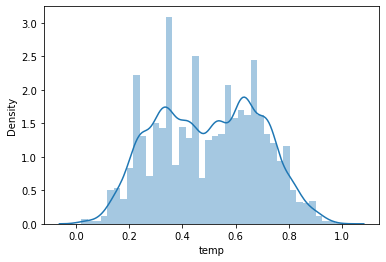

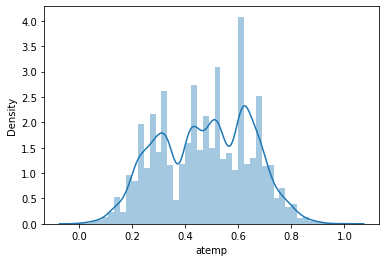

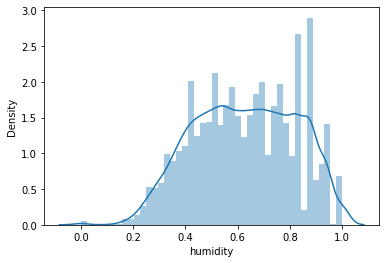

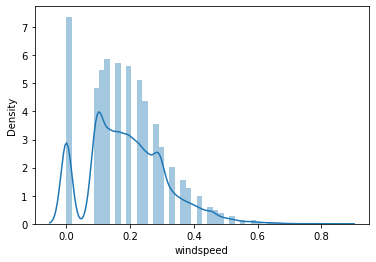

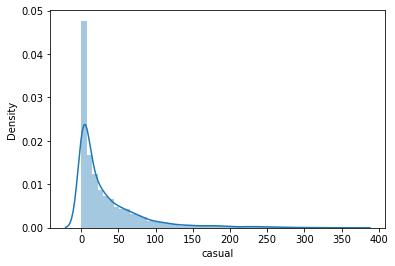

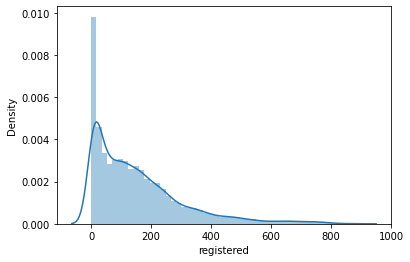

In [ ]:
for i in cont_col:
    sns.distplot(data[i])
    plt.show()

temp and atemp have similar kind of distribution, some features are showing near by normal distribution while e.g windspeed and humidity are skewed

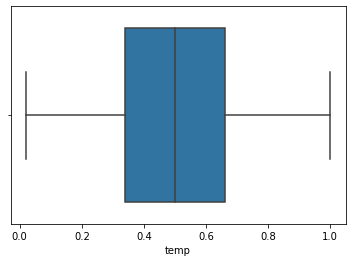

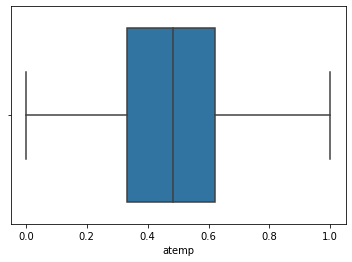

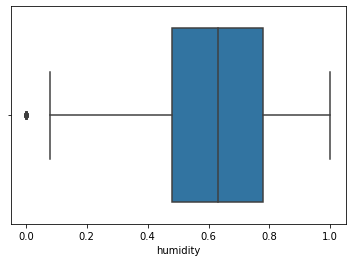

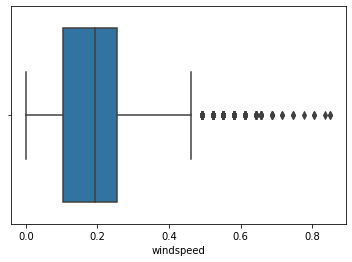

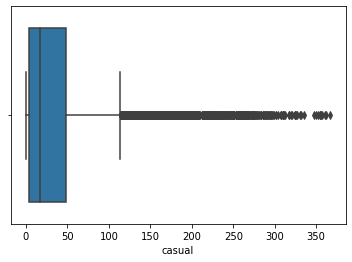

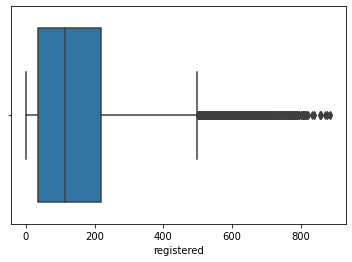

In [ ]:
for i in cont_col:
    sns.boxplot(data[i])
    plt.show()

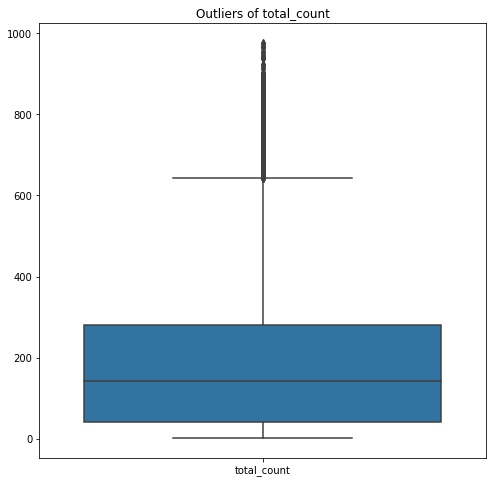

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
#Boxplot for cnt
sns.boxplot(data=data[['total_count']])
ax.set_title('Outliers of total_count')
plt.show()

# 2. Preprocessing

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 16.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=a083a9f405fbfee34fe1e2614e13eb57deff863a19df2baba2d58aba7ac76364
  Stored in directory: /root/.cache/pip/wheels/45/e1/7c/5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=2516799f5efd5b90ca3eb2273bee8c92237e8657efed81420e1cf87ce3e84427
  Stored in directory: /root/.cache/pip/wheels/5f/e9/7a/9969b4e11eb626b45f12a46849b8c65aa718244a243583caf1
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import KNN

#create dataframe for outliers
outliers=pd.DataFrame(data,columns=['humidity', 'windspeed','casual', 'registered', 'total_count'])
 #Cnames for outliers                     
cnames=['humidity', 'windspeed','casual', 'registered', 'total_count']       
                      
for i in cnames:
    q75,q25=np.percentile(outliers.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    outliers.loc[outliers.loc[:,i]<min,:i]=np.nan  #Replace with NA
    outliers.loc[outliers.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
outliers['humidity']=outliers['humidity'].fillna(outliers['humidity'].mean())
outliers['windspeed']=outliers['windspeed'].fillna(outliers['windspeed'].mean())
outliers['casual']=outliers['casual'].fillna(outliers['casual'].mean())
outliers['registered']=outliers['registered'].fillna(outliers['registered'].mean())
outliers['total_count']=outliers['total_count'].fillna(outliers['total_count'].mean())

In [ ]:
#Replacing the imputated humidity
data['humidity']=data['humidity'].replace(outliers['humidity'])
#Replacing the imputated windspeed
data['windspeed']=data['windspeed'].replace(outliers['windspeed'])
#Replacing the imputated humidity
data['casual']=data['casual'].replace(outliers['casual'])
#Replacing the imputated humidity
data['registered']=data['registered'].replace(outliers['registered'])
#Replacing the imputated humidity
data['total_count']=data['total_count'].replace(outliers['total_count'])


In [ ]:
data.head()

datetime  season  year  month  hr  holiday  weekday  workingday  \
0 2011-01-01       1     0      1   0        0        6           0   
1 2011-01-01       1     0      1   1        0        6           0   
2 2011-01-01       1     0      1   2        0        6           0   
3 2011-01-01       1     0      1   3        0        6           0   
4 2011-01-01       1     0      1   4        0        6           0   

   weather_condition  temp   atemp  humidity  windspeed  casual  registered  \
0                  1  0.24  0.2879      0.81        0.0     3.0        47.0   
1                  1  0.22  0.2727      0.80        0.0     1.0        19.0   
2                  1  0.22  0.2727      0.80        0.0     0.0         4.0   
3                  1  0.24  0.2879      0.75        0.0     3.0        24.0   
4                  1  0.24  0.2879      0.75        0.0     3.0        32.0   

   total_count  
0         93.0  
1         65.0  
2         20.0  
3         94.0  
4         40.0

In [ ]:
data.describe()

season          year         month            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday  weather_condition          temp  \
count  17379.000000  17379.000000       17379.000000  17379.000000   
mean       3.003683      0.682721           1.425283      0.496987   
std        2.005771      0.465431           0.639357      0.192556   
min        0.000000      0.000000           1.000000      0.020000   
25%        1.000000      0.000000           1.000000      0.340000   
50%        3.000000      1.000000           1.000000      0.500000   
75%        5.000000      1.000000           2.000000      0.660000   
max        6.000000      1.000000           4.000000      1.000000   

              atemp      humidity     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.625147      0.190098      7.501122     44.738593   
std        0.171850      0.187261      0.122340     10.091345     44.852120   
min        0.000000      0.080000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      1.000000      8.000000   
50%        0.484800      0.630000      0.194000      3.000000     33.000000   
75%        0.621200      0.780000      0.253700      9.000000     64.000000   
max        1.000000      0.970000      0.850700     47.000000    247.000000   

        total_count  
count  17379.000000  
mean      50.927211  
std       47.658389  
min        1.000000  
25%       10.000000  
50%       40.000000  
75%       75.000000  
max      249.000000

In [ ]:
data.isna().sum()

datetime             0
season               0
year                 0
month                0
hr                   0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [ ]:
stats2 = data.describe()
stats2.loc['var'] = data.var().tolist()
stats2.loc['skew'] = data.skew().tolist()
stats2.loc['kurt'] = data.kurtosis().tolist()
stats2

season          year         month            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   
var        1.225268      0.250008     11.825178     47.808998      0.027944   
skew      -0.005416     -0.010243     -0.009253     -0.010680      5.638538   
kurt      -1.334251     -2.000125     -1.201878     -1.198021     29.796540   

            weekday    workingday  weather_condition          temp  \
count  17379.000000  17379.000000       17379.000000  17379.000000   
mean       3.003683      0.682721           1.425283      0.496987   
std        2.005771      0.465431           0.639357      0.192556   
min        0.000000      0.000000           1.000000      0.020000   
25%        1.000000      0.000000           1.000000      0.340000   
50%        3.000000      1.000000           1.000000      0.500000   
75%        5.000000      1.000000           2.000000      0.660000   
max        6.000000      1.000000           4.000000      1.000000   
var        4.023119      0.216626           0.408777      0.037078   
skew      -0.002998     -0.785258           1.228047     -0.006021   
kurt      -1.255997     -1.383529           0.350151     -0.941844   

              atemp      humidity     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.625147      0.190098      7.501122     44.738593   
std        0.171850      0.187261      0.122340     10.091345     44.852120   
min        0.000000      0.080000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      1.000000      8.000000   
50%        0.484800      0.630000      0.194000      3.000000     33.000000   
75%        0.621200      0.780000      0.253700      9.000000     64.000000   
max        1.000000      0.970000      0.850700     47.000000    247.000000   
var        0.029532      0.035067      0.014967    101.835236   2011.712707   
skew      -0.090429     -0.149962      0.574905      2.250147      1.530115   
kurt      -0.845412     -0.949072      0.590820      4.835117      2.396869   

        total_count  
count  17379.000000  
mean      50.927211  
std       47.658389  
min        1.000000  
25%       10.000000  
50%       40.000000  
75%       75.000000  
max      249.000000  
var     2271.322069  
skew       1.278622  
kurt       1.576468

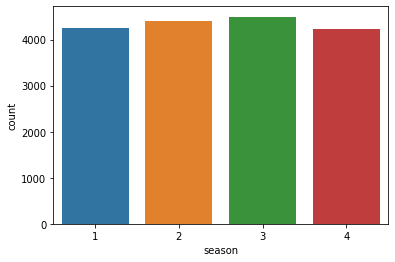

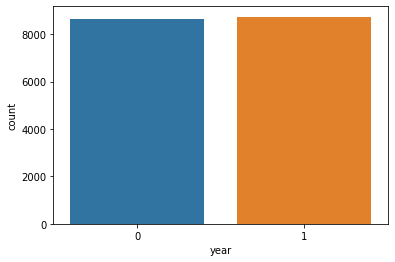

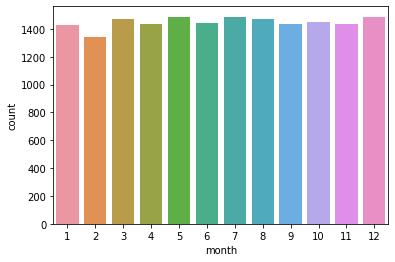

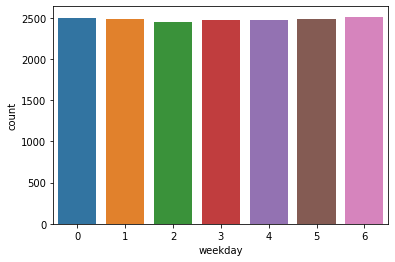

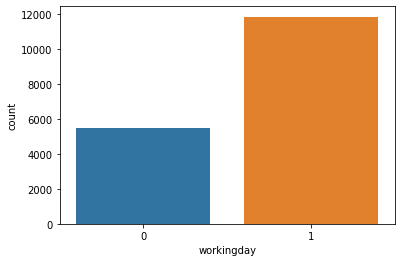

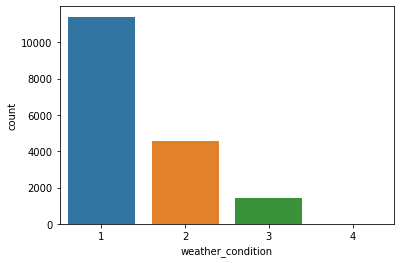

In [ ]:
for i in cat_col:
    sns.countplot(data[i])
    plt.show()

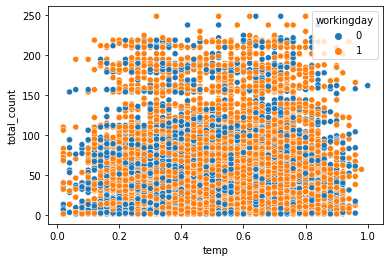

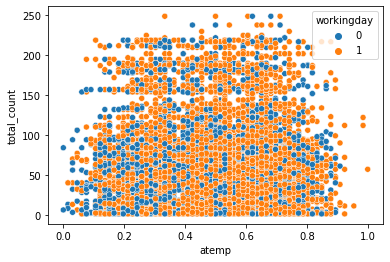

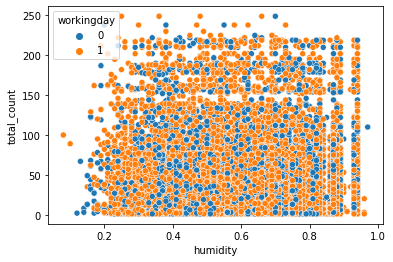

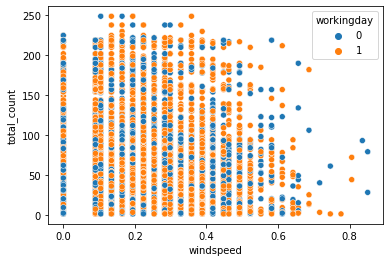

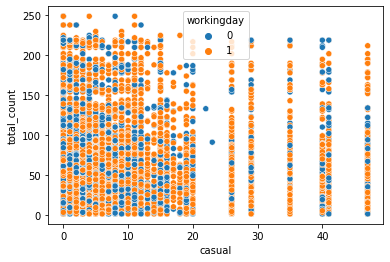

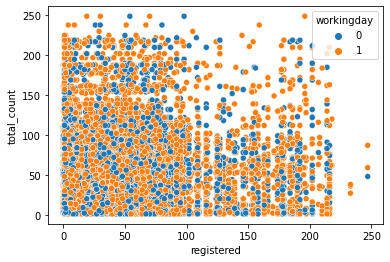

In [ ]:
# plotting graph b/w count and continuous columns taking working_day as hue
for i in cont_col:
    sns.scatterplot(data[i], data['total_count'], hue = data['workingday'])
    plt.show()

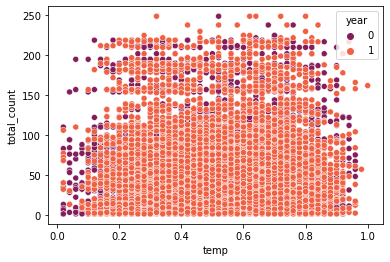

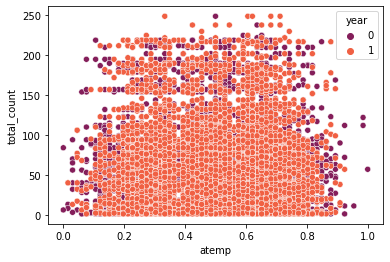

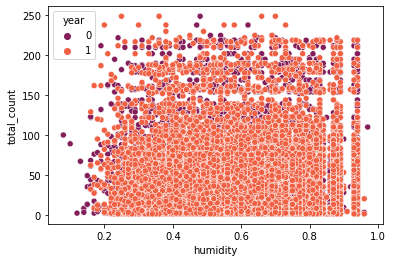

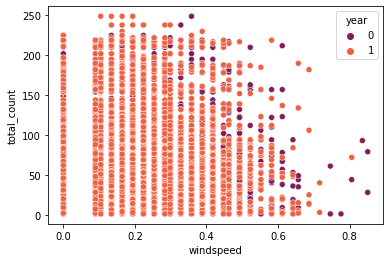

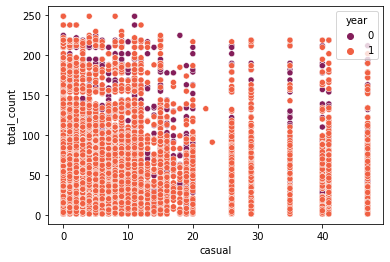

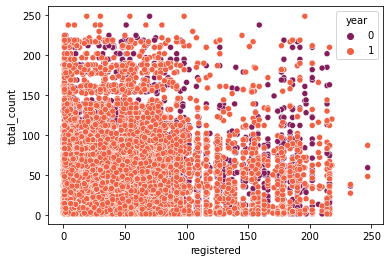

In [ ]:
for i in cont_col:
    sns.scatterplot(data[i], data['total_count'], hue = data['year'], palette = 'rocket')
    plt.show()

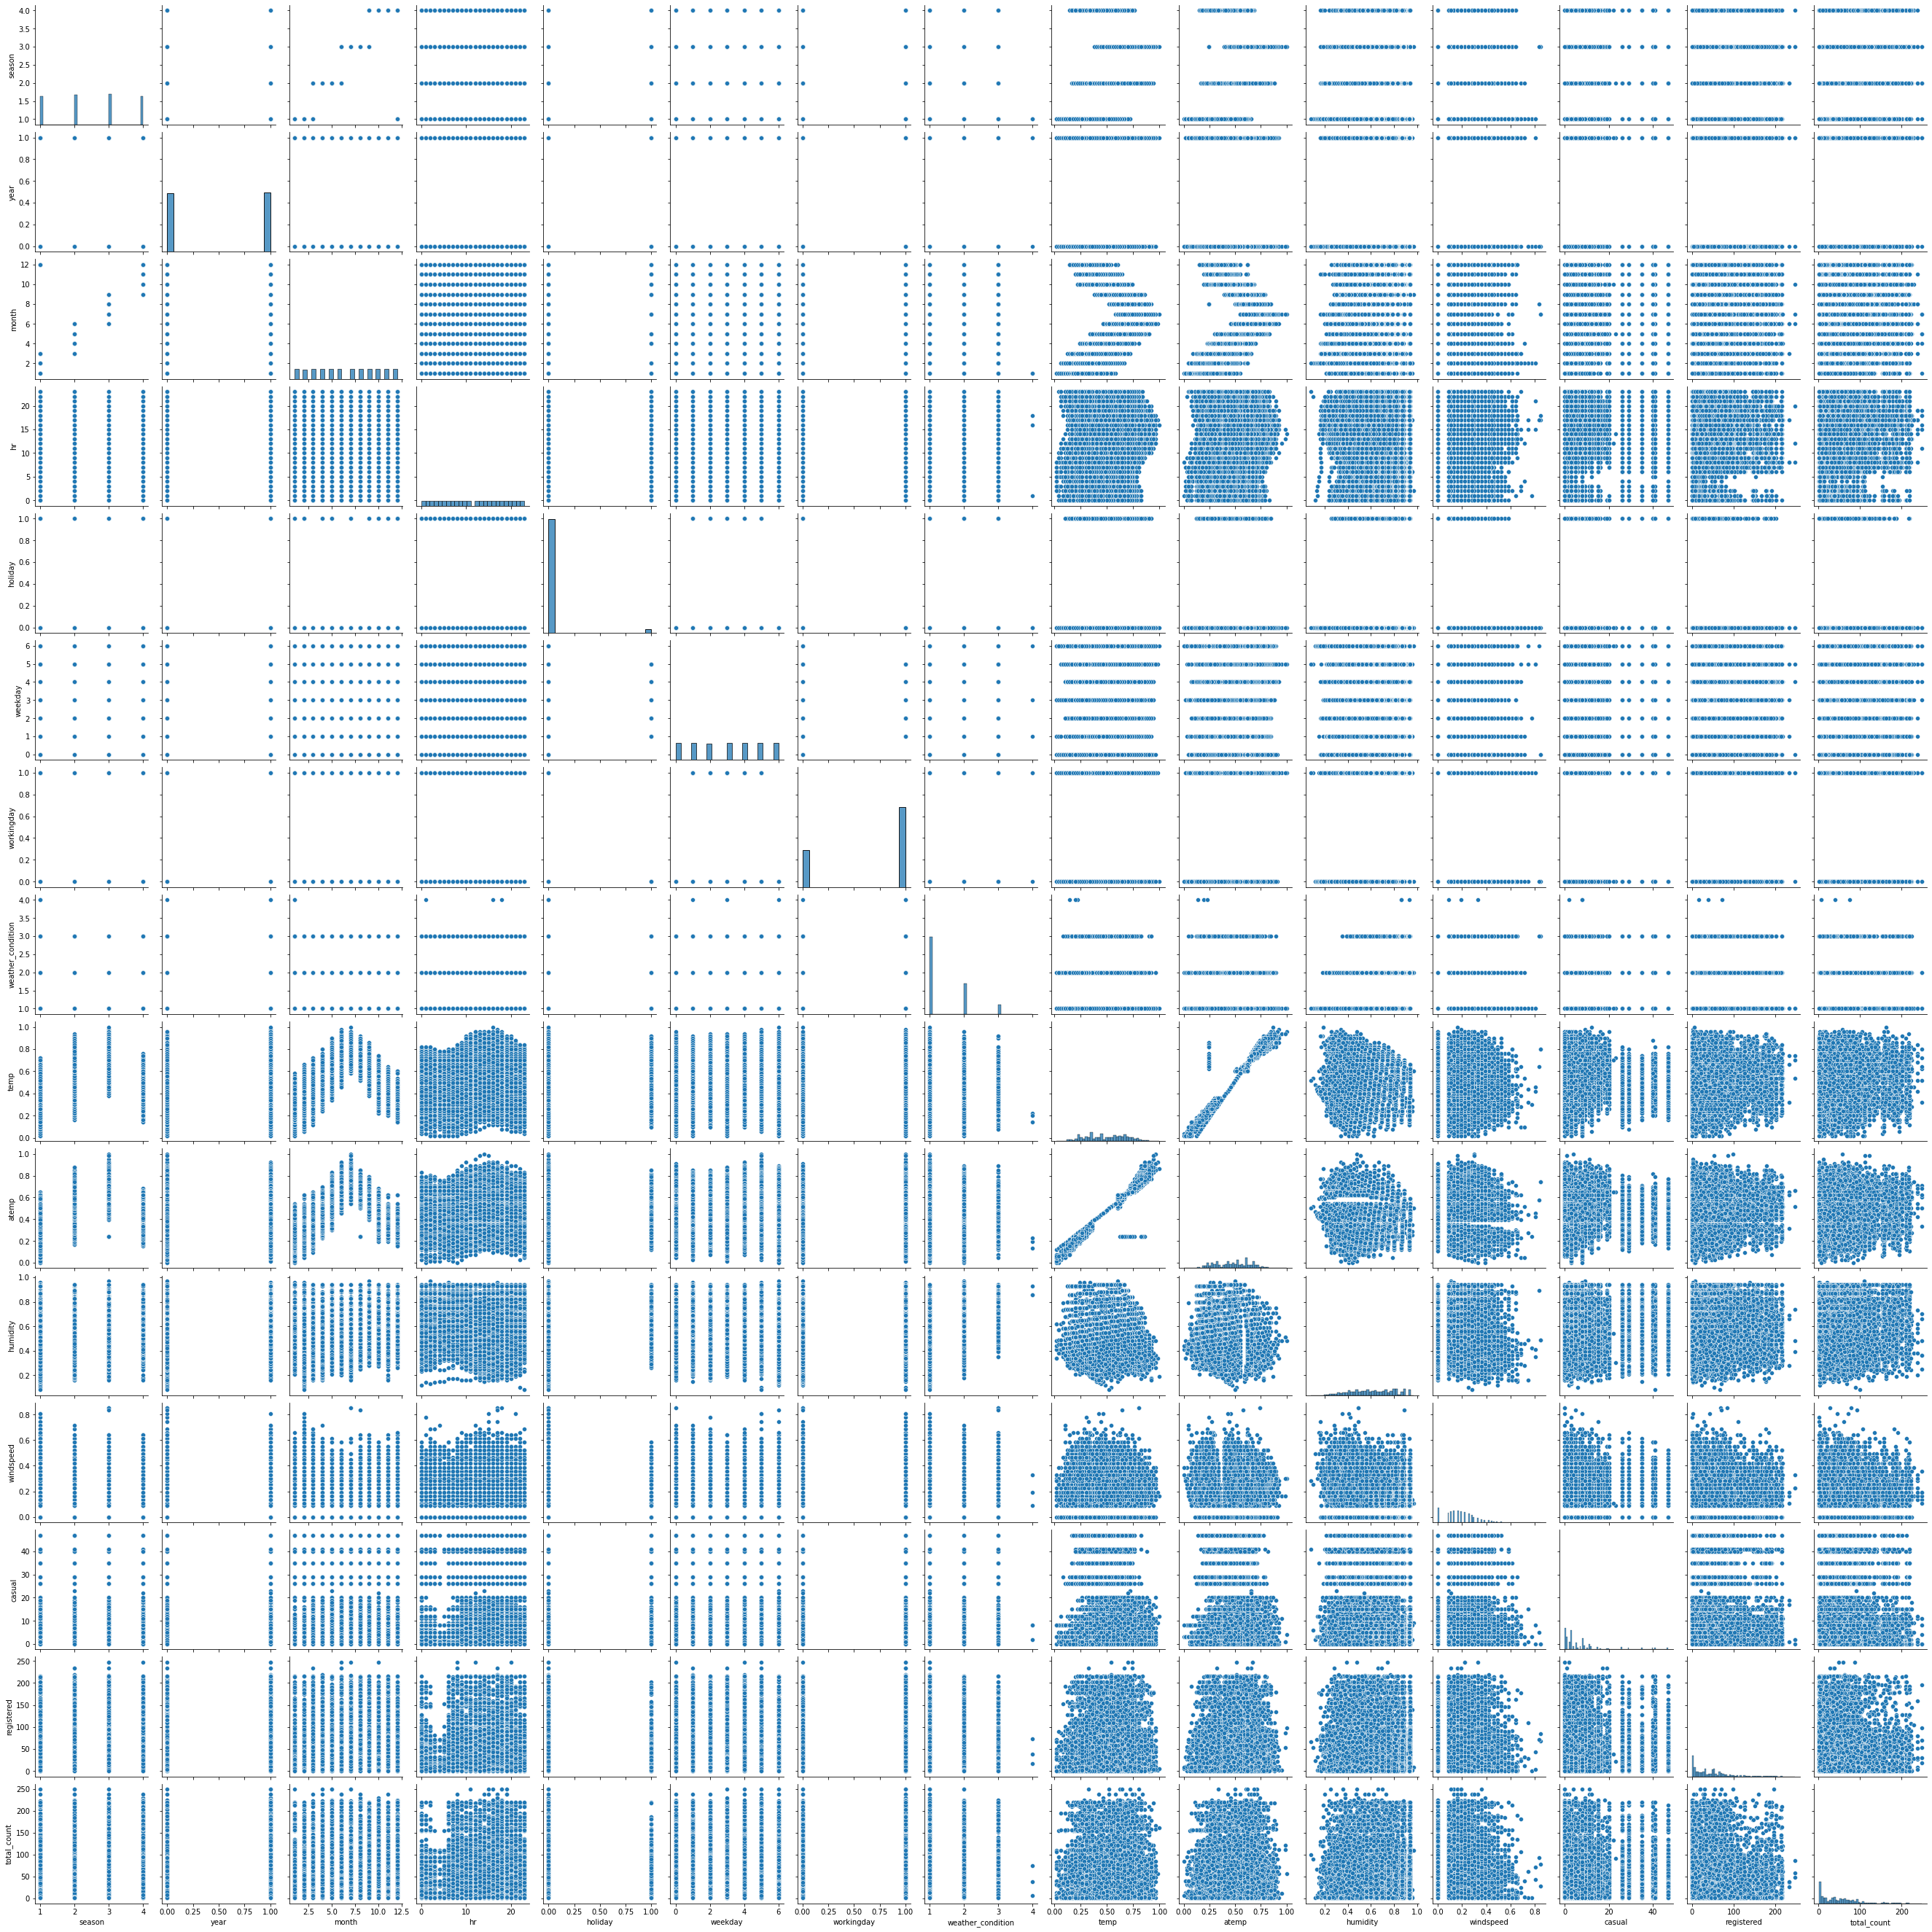

In [ ]:
# plotting pairplot
sns.pairplot(data)
plt.show()

In [ ]:
# One-hot encode the categorical variables
data_ohe = pd.get_dummies(data, columns=['season', 'weather_condition', 'weekday'])



In [ ]:
data_ohe.dtypes

datetime               datetime64[ns]
year                            int64
month                           int64
hr                              int64
holiday                         int64
workingday                      int64
temp                          float64
atemp                         float64
humidity                      float64
windspeed                     float64
casual                        float64
registered                    float64
total_count                   float64
season_1                        uint8
season_2                        uint8
season_3                        uint8
season_4                        uint8
weather_condition_1             uint8
weather_condition_2             uint8
weather_condition_3             uint8
weather_condition_4             uint8
weekday_0                       uint8
weekday_1                       uint8
weekday_2                       uint8
weekday_3                       uint8
weekday_4                       uint8
weekday_5   

In [ ]:
data_ohe.head()

datetime  year  month  hr  holiday  workingday  temp   atemp  humidity  \
0 2011-01-01     0      1   0        0           0  0.24  0.2879      0.81   
1 2011-01-01     0      1   1        0           0  0.22  0.2727      0.80   
2 2011-01-01     0      1   2        0           0  0.22  0.2727      0.80   
3 2011-01-01     0      1   3        0           0  0.24  0.2879      0.75   
4 2011-01-01     0      1   4        0           0  0.24  0.2879      0.75   

   windspeed  ...  weather_condition_2  weather_condition_3  \
0        0.0  ...                    0                    0   
1        0.0  ...                    0                    0   
2        0.0  ...                    0                    0   
3        0.0  ...                    0                    0   
4        0.0  ...                    0                    0   

   weather_condition_4  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0                    0          0          0          0          0          0   
1                    0          0          0          0          0          0   
2                    0          0          0          0          0          0   
3                    0          0          0          0          0          0   
4                    0          0          0          0          0          0   

   weekday_5  weekday_6  
0          0          1  
1          0          1  
2          0          1  
3          0          1  
4          0          1  

[5 rows x 28 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the continuous variables
scaler = StandardScaler()
scaled_vars = scaler.fit_transform(data_ohe[['casual', 'registered', 'total_count']])
data_ohe[['casual', 'registered', 'total_count']] = scaled_vars

In [ ]:
data_ohe.head()

datetime  year  month  hr  holiday  workingday  temp   atemp  humidity  \
0 2011-01-01     0      1   0        0           0  0.24  0.2879      0.81   
1 2011-01-01     0      1   1        0           0  0.22  0.2727      0.80   
2 2011-01-01     0      1   2        0           0  0.22  0.2727      0.80   
3 2011-01-01     0      1   3        0           0  0.24  0.2879      0.75   
4 2011-01-01     0      1   4        0           0  0.24  0.2879      0.75   

   windspeed  ...  weather_condition_2  weather_condition_3  \
0        0.0  ...                    0                    0   
1        0.0  ...                    0                    0   
2        0.0  ...                    0                    0   
3        0.0  ...                    0                    0   
4        0.0  ...                    0                    0   

   weather_condition_4  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0                    0          0          0          0          0          0   
1                    0          0          0          0          0          0   
2                    0          0          0          0          0          0   
3                    0          0          0          0          0          0   
4                    0          0          0          0          0          0   

   weekday_5  weekday_6  
0          0          1  
1          0          1  
2          0          1  
3          0          1  
4          0          1  

[5 rows x 28 columns]

In [ ]:
data.dtypes

datetime             datetime64[ns]
season                        int64
year                          int64
month                         int64
hr                            int64
holiday                       int64
weekday                       int64
workingday                    int64
weather_condition             int64
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                      float64
registered                  float64
total_count                 float64
dtype: object

# 3. Useing different advanced regression algorithms 

In [ ]:
# In the Homework sheet: random subsample of the data (5-15% size) unless explicitly stated otherwise. So I decided to choose 10%

import pandas as pd
import numpy as np

np.random.seed(42)

# choose the percentage of rows to sample
frac = 0.1  # 10%

# randomly sample a subset of the data
sampled_data = data_ohe.sample(frac=frac)

# print the size of the subsample
print(f'Size of the subsample: {len(sampled_data)}')


Size of the subsample: 1738


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split


In [ ]:
# Load data
X = sampled_data.drop(['total_count', 'datetime'], axis=1)
y = sampled_data['total_count']



In [ ]:
X

year  month  hr  holiday  workingday  temp   atemp  humidity  \
12830     1      6  19        0           0  0.80  0.6970      0.27   
8688      1      1  20        1           0  0.24  0.2273      0.41   
7091      0     10   2        0           1  0.32  0.3030      0.66   
12230     1      5  19        0           1  0.78  0.7121      0.52   
431       0      1   0        0           1  0.26  0.2273      0.56   
...     ...    ...  ..      ...         ...   ...     ...       ...   
2069      0      4   2        0           1  0.26  0.2576      0.93   
5431      0      8   5        0           1  0.64  0.5758      0.83   
4119      0      6  13        0           0  0.74  0.6515      0.40   
7132      0     10  19        0           0  0.24  0.2121      0.87   
11351     1      4   4        0           1  0.30  0.2879      0.81   

       windspeed    casual  ...  weather_condition_2  weather_condition_3  \
12830     0.1940 -0.644246  ...                    0                    0   
8688      0.2239 -0.743344  ...                    0                    0   
7091      0.2836  0.049438  ...                    0                    0   
12230     0.3582 -0.743344  ...                    0                    0   
431       0.3881 -0.743344  ...                    0                    0   
...          ...       ...  ...                  ...                  ...   
2069      0.1940 -0.446051  ...                    0                    1   
5431      0.0000  0.049438  ...                    0                    0   
4119      0.2836 -0.743344  ...                    0                    0   
7132      0.3582 -0.446051  ...                    0                    0   
11351     0.2836 -0.446051  ...                    0                    1   

       weather_condition_4  weekday_0  weekday_1  weekday_2  weekday_3  \
12830                    0          0          0          0          0   
8688                     0          0          1          0          0   
7091                     0          0          0          0          0   
12230                    0          0          0          1          0   
431                      0          0          0          0          0   
...                    ...        ...        ...        ...        ...   
2069                     0          0          0          0          0   
5431                     0          0          0          0          0   
4119                     0          0          0          0          0   
7132                     0          0          0          0          0   
11351                    0          0          1          0          0   

       weekday_4  weekday_5  weekday_6  
12830          0          0          1  
8688           0          0          0  
7091           0          1          0  
12230          0          0          0  
431            1          0          0  
...          ...        ...        ...  
2069           0          1          0  
5431           0          1          0  
4119           0          0          1  
7132           0          0          1  
11351          0          0          0  

[1738 rows x 26 columns]

In [ ]:
y

12830    2.309687
8688     0.064477
7091    -1.047636
12230   -1.047636
431      0.903808
           ...   
2069    -1.005670
5431     0.337260
4119    -0.690921
7132     0.526109
11351   -0.795837
Name: total_count, Length: 1738, dtype: float64

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.1. KNN Regressor 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
# Create a KNN Regressor object
knn = KNeighborsRegressor()

In [ ]:
# Define the hyperparameters to tune
params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}



In [ ]:
# Create a GridSearchCV object to search for the best hyperparameters
grid = GridSearchCV(knn, params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)



In [ ]:
# Fit the GridSearchCV object on the training data
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [ ]:
# Print the best hyperparameters
print('Best hyperparameters:', grid.best_params_)



Best hyperparameters: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [ ]:
# Use the best estimator to make predictions on the test set
y_pred = grid.predict(X_test)



In [ ]:
# Evaluate the model using MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE on test set:', mae)

MAE on test set: 0.8287136773495006


# 3.2. Decision Tree Regressor 

In [ ]:
from sklearn.tree import DecisionTreeRegressor



In [ ]:
# Create a Decision Tree Regressor object
dtr = DecisionTreeRegressor()



In [ ]:
# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}



In [ ]:
# Create a GridSearchCV object to search for the best hyperparameters
grid = GridSearchCV(dtr, params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)



In [ ]:
# Fit the GridSearchCV object on the training data
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Print the best hyperparameters
print('Best hyperparameters:', grid.best_params_)



Best hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Use the best estimator to make predictions on the test set
y_pred = grid.predict(X_test)



In [ ]:
# Evaluate the model using MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE on test set:', mae)

MAE on test set: 0.856019389934019


# 3.3 Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Define the Random Forest regressor model
rf_regressor = RandomForestRegressor(random_state=42)



In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 20, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt']}



In [ ]:
# Perform the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)



Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.7099019300205964


In [ ]:
# Train the model on the best hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'], min_samples_leaf=grid_search.best_params_['min_samples_leaf'], max_features=grid_search.best_params_['max_features'], random_state=42)
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=300, random_state=42)

In [ ]:
# Predict on the test data
y_pred = rf_regressor.predict(X_test)



In [ ]:
# Evaluate the performance of the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.758402561326777


# 3. 4. SVM Regressor 

In [ ]:
from sklearn.svm import SVR

# Define the SVM regressor model
svm_regressor = SVR()



In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'epsilon': [0.1, 0.2, 0.3, 0.4],
              'gamma': ['scale', 'auto']}



In [ ]:
# Perform the grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_absolute_error')

In [ ]:
# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)



Best hyperparameters: {'C': 0.1, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.738743182553826


In [ ]:
# Train the model on the best hyperparameters
svm_regressor = SVR(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], epsilon=grid_search.best_params_['epsilon'], gamma=grid_search.best_params_['gamma'])
svm_regressor.fit(X_train, y_train)



SVR(C=0.1, epsilon=0.2, gamma='auto')

In [ ]:
# Predict on the test data
y_pred = svm_regressor.predict(X_test)



In [ ]:
# Evaluate the performance of the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.7969041895716136


# 3. 5. XGBoost

In [ ]:
import xgboost as xgb

# Define the Gradient Boosting Machine model
gbm = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)




In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}



In [ ]:
# Perform the grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)



Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.721751400051574


In [ ]:
# Train the model on the best hyperparameters
gbm = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=grid_search.best_params_['learning_rate'], 
                       max_depth=grid_search.best_params_['max_depth'], n_estimators=grid_search.best_params_['n_estimators'], 
                       random_state=42)
gbm.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# Predict on the test data
y_pred = gbm.predict(X_test)



In [ ]:
# Evaluate the performance of the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.7757263127890914


**Best model: Decision Tree Regressor: 0.86896**

2.: KNN 0.828

3.: SVM 0.797

4.: XGB 0.775

5.: RF 0.758

So, in the followin, I work with Decision Tree.

# 4. Considering the best model, train it on the first year and validate on the second year

In [ ]:
# Split the data into train and test sets based on the date
data = sampled_data
train_data = sampled_data[sampled_data['datetime'] < '2012-01-01']
test_data = sampled_data[sampled_data['datetime'] >= '2012-01-01']

# Split the train and test data into features and target
X_train = train_data.drop(['datetime', 'total_count'], axis=1)
y_train = train_data['total_count']
X_test = test_data.drop(['datetime', 'total_count'], axis=1)
y_test = test_data['total_count']

# Train a linear regression model on the first year of data
model = DecisionTreeRegressor()

params = {
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'max_features': ['sqrt']
}

grid.fit(X_train, y_train)

# Make predictions on the second year of data
y_pred = grid.predict(X_test)

# Evaluate the model's performance using MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE on test set:', mae)

MAE on test set: 0.8053586253652448


Answer: The model has a bit lower MAE. Probably because in the first task I had a 10% sample. So this solution might be closer to reality.

# 5. Considering the best model, train it on the first year with multitarget (casual, registered) and validate on the second year. Analyze both targets independently. Then use a sum of both targets to predict cnt on the second year. Estimate the quality. 

In [ ]:
sampled_data

datetime  year  month  hr  holiday  workingday  temp   atemp  \
12830 2012-06-23     1      6  19        0           0  0.80  0.6970   
8688  2012-01-02     1      1  20        1           0  0.24  0.2273   
7091  2011-10-28     0     10   2        0           1  0.32  0.3030   
12230 2012-05-29     1      5  19        0           1  0.78  0.7121   
431   2011-01-20     0      1   0        0           1  0.26  0.2273   
...          ...   ...    ...  ..      ...         ...   ...     ...   
2069  2011-04-01     0      4   2        0           1  0.26  0.2576   
5431  2011-08-19     0      8   5        0           1  0.64  0.5758   
4119  2011-06-25     0      6  13        0           0  0.74  0.6515   
7132  2011-10-29     0     10  19        0           0  0.24  0.2121   
11351 2012-04-23     1      4   4        0           1  0.30  0.2879   

       humidity  windspeed  ...  weather_condition_2  weather_condition_3  \
12830      0.27     0.1940  ...                    0                    0   
8688       0.41     0.2239  ...                    0                    0   
7091       0.66     0.2836  ...                    0                    0   
12230      0.52     0.3582  ...                    0                    0   
431        0.56     0.3881  ...                    0                    0   
...         ...        ...  ...                  ...                  ...   
2069       0.93     0.1940  ...                    0                    1   
5431       0.83     0.0000  ...                    0                    0   
4119       0.40     0.2836  ...                    0                    0   
7132       0.87     0.3582  ...                    0                    0   
11351      0.81     0.2836  ...                    0                    1   

       weather_condition_4  weekday_0  weekday_1  weekday_2  weekday_3  \
12830                    0          0          0          0          0   
8688                     0          0          1          0          0   
7091                     0          0          0          0          0   
12230                    0          0          0          1          0   
431                      0          0          0          0          0   
...                    ...        ...        ...        ...        ...   
2069                     0          0          0          0          0   
5431                     0          0          0          0          0   
4119                     0          0          0          0          0   
7132                     0          0          0          0          0   
11351                    0          0          1          0          0   

       weekday_4  weekday_5  weekday_6  
12830          0          0          1  
8688           0          0          0  
7091           0          1          0  
12230          0          0          0  
431            1          0          0  
...          ...        ...        ...  
2069           0          1          0  
5431           0          1          0  
4119           0          0          1  
7132           0          0          1  
11351          0          0          0  

[1738 rows x 28 columns]

In [ ]:
sampled_data['total_count']

12830    2.309687
8688     0.064477
7091    -1.047636
12230   -1.047636
431      0.903808
           ...   
2069    -1.005670
5431     0.337260
4119    -0.690921
7132     0.526109
11351   -0.795837
Name: total_count, Length: 1738, dtype: float64

In [ ]:
sampled_data.datetime

12830   2012-06-23
8688    2012-01-02
7091    2011-10-28
12230   2012-05-29
431     2011-01-20
           ...    
2069    2011-04-01
5431    2011-08-19
4119    2011-06-25
7132    2011-10-29
11351   2012-04-23
Name: datetime, Length: 1738, dtype: datetime64[ns]

In [ ]:
# Load the data

df = sampled_data
df.head()

datetime  year  month  hr  holiday  workingday  temp   atemp  \
12830 2012-06-23     1      6  19        0           0  0.80  0.6970   
8688  2012-01-02     1      1  20        1           0  0.24  0.2273   
7091  2011-10-28     0     10   2        0           1  0.32  0.3030   
12230 2012-05-29     1      5  19        0           1  0.78  0.7121   
431   2011-01-20     0      1   0        0           1  0.26  0.2273   

       humidity  windspeed  ...  weather_condition_2  weather_condition_3  \
12830      0.27     0.1940  ...                    0                    0   
8688       0.41     0.2239  ...                    0                    0   
7091       0.66     0.2836  ...                    0                    0   
12230      0.52     0.3582  ...                    0                    0   
431        0.56     0.3881  ...                    0                    0   

       weather_condition_4  weekday_0  weekday_1  weekday_2  weekday_3  \
12830                    0          0          0          0          0   
8688                     0          0          1          0          0   
7091                     0          0          0          0          0   
12230                    0          0          0          1          0   
431                      0          0          0          0          0   

       weekday_4  weekday_5  weekday_6  
12830          0          0          1  
8688           0          0          0  
7091           0          1          0  
12230          0          0          0  
431            1          0          0  

[5 rows x 28 columns]

In [ ]:
# # Convert the 'dteday' column to a datetime object
#sampled_data['datetime'] = pd.to_datetime(sampled_data['datetime'])

# Split the data into training and validation sets
df['Date'] = pd.to_datetime(df['datetime'])
df = df.set_index(df['Date'])
df = df.sort_index()
train = df.loc['2011-01-01':'2011-12-31']
val = df.loc['2012-01-01':'2012-12-31']

# Create lagged features for training and validation data for each target variable
n_lags = 3 # number of lagged features
for i in range(1, n_lags+1):
    train[f'casual_lag_{i}'] = train['casual'].shift(i)
    train[f'registered_lag_{i}'] = train['registered'].shift(i)
    val[f'casual_lag_{i}'] = val['casual'].shift(i)
    val[f'registered_lag_{i}'] = val['registered'].shift(i)

# Drop rows with missing values
train.dropna(inplace=True)
val.dropna(inplace=True)



In [ ]:
train=train.drop(['datetime'], axis=1)

In [ ]:
train=train.drop(['Date'], axis=1)

In [ ]:
val=val.drop(['datetime'], axis=1)

In [ ]:
val=val.drop(['Date'], axis=1)

In [ ]:
# Split the data into features and target variable for each target variable
X_train_casual, y_train_casual = train.drop(['casual', 'registered', 'total_count'], axis=1), train['casual']
X_train_registered, y_train_registered = train.drop(['casual', 'registered', 'total_count'], axis=1), train['registered']
X_val_casual, y_val_casual = val.drop(['casual', 'registered', 'total_count'], axis=1), val['total_count']
X_val_registered, y_val_registered = val.drop(['casual', 'registered', 'total_count'], axis=1), val['registered']

In [ ]:
X_train_casual

year  month  hr  holiday  workingday  temp   atemp  humidity  \
Date                                                                       
2011-01-03     0      1  14        0           1  0.26  0.2424      0.30   
2011-01-03     0      1  12        0           1  0.22  0.2121      0.35   
2011-01-03     0      1   5        0           1  0.16  0.1364      0.47   
2011-01-03     0      1   0        0           1  0.22  0.1970      0.44   
2011-01-04     0      1  17        0           1  0.28  0.2727      0.48   
...          ...    ...  ..      ...         ...   ...     ...       ...   
2011-12-30     0     12  15        0           1  0.42  0.4242      0.44   
2011-12-30     0     12   9        0           1  0.26  0.3030      0.75   
2011-12-30     0     12  23        0           1  0.36  0.3333      0.66   
2011-12-31     0     12  20        0           0  0.42  0.4242      0.54   
2011-12-31     0     12   7        0           0  0.38  0.3939      0.76   

            windspeed  season_1  ...  weekday_3  weekday_4  weekday_5  \
Date                             ...                                    
2011-01-03     0.2836         1  ...          0          0          0   
2011-01-03     0.2985         1  ...          0          0          0   
2011-01-03     0.2836         1  ...          0          0          0   
2011-01-03     0.3582         1  ...          0          0          0   
2011-01-04     0.2239         1  ...          0          0          0   
...               ...       ...  ...        ...        ...        ...   
2011-12-30     0.0000         1  ...          0          0          1   
2011-12-30     0.0000         1  ...          0          0          1   
2011-12-30     0.2537         1  ...          0          0          1   
2011-12-31     0.2239         1  ...          0          0          0   
2011-12-31     0.0000         1  ...          0          0          0   

            weekday_6  casual_lag_1  registered_lag_1  casual_lag_2  \
Date                                                                  
2011-01-03          0     -0.446051         -0.841425     -0.446051   
2011-01-03          0      1.833196          0.095013     -0.446051   
2011-01-03          0      3.914247         -0.952905      1.833196   
2011-01-03          0     -0.446051         -0.774536      3.914247   
2011-01-04          0     -0.446051         -0.975201     -0.446051   
...               ...           ...               ...           ...   
2011-12-30          0     -0.446051         -0.462390     -0.644246   
2011-12-30          0      0.247633         -0.863721     -0.446051   
2011-12-30          0     -0.148758          0.853081      0.247633   
2011-12-31          1      3.914247          0.295678     -0.148758   
2011-12-31          1     -0.644246          2.302330      3.914247   

            registered_lag_2  casual_lag_3  registered_lag_3  
Date                                                          
2011-01-03         -0.462390     -0.545148         -0.819128  
2011-01-03         -0.841425     -0.446051         -0.462390  
2011-01-03          0.095013     -0.446051         -0.841425  
2011-01-03         -0.952905      1.833196          0.095013  
2011-01-04         -0.774536      3.914247         -0.952905  
...                      ...           ...               ...  
2011-12-30          0.295678      0.346731          1.588854  
2011-12-30         -0.462390     -0.644246          0.295678  
2011-12-30         -0.863721     -0.446051         -0.462390  
2011-12-31          0.853081      0.247633         -0.863721  
2011-12-31          0.295678     -0.148758          0.853081  

[866 rows x 30 columns]

In [ ]:
# Train the random forest model for each target variable
rf_casual = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_casual.fit(X_train_casual, y_train_casual)

rf_registered = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_registered.fit(X_train_registered, y_train_registered)


y_pred_casual = rf_casual.predict(X_val_casual)
y_pred_registered = rf_registered.predict(X_val_registered)


# Evaluate the model performance for each target variable
mae_casual = mean_absolute_error(y_val_casual, y_pred_casual)
mae_registered = mean_absolute_error(y_val_registered,y_pred_registered)
print(f'Mean Squared Error for casual: {mae_casual:.2f}')
print(f'Mean Squared Error for registered: {mae_registered:.2f}')

# Predict total_count as a sum of casual and registered
y_pred_total_count = [y_pred_casual[i] + y_pred_registered[i] for i in range(len(y_pred_casual))]

# Evaluate the model performance for cnt
y_val_total_count = val['total_count']
mae_total_count = mean_absolute_error(y_val_total_count,y_pred_total_count)
print(f'Mean Squared Error for total: {mae_total_count:.2f}')


Mean Squared Error for casual: 0.82
Mean Squared Error for registered: 0.71
Mean Squared Error for total: 0.81


So, we know that casual + registred = total. That is why casual shows so similar result to total.

In [ ]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 12830 to 11351
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1738 non-null   datetime64[ns]
 1   year                 1738 non-null   int64         
 2   month                1738 non-null   int64         
 3   hr                   1738 non-null   int64         
 4   holiday              1738 non-null   int64         
 5   workingday           1738 non-null   int64         
 6   temp                 1738 non-null   float64       
 7   atemp                1738 non-null   float64       
 8   humidity             1738 non-null   float64       
 9   windspeed            1738 non-null   float64       
 10  casual               1738 non-null   float64       
 11  registered           1738 non-null   float64       
 12  total_count          1738 non-null   float64       
 13  season_1             1738 no

In [ ]:
# The tried to solve the task in an other way

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the data
data = sampled_data

# Split the data into train and test sets based on year
train_data = data[data['year'] == 0]
test_data = data[data['year'] == 1]

# Define the features and targets
features = ['season_1', 'month', 'hr', 'holiday', 'weekday_0', 'workingday', 'weather_condition_1', 'weather_condition_2', 'weather_condition_3', 'weather_condition_4',
            'temp', 'atemp', 'humidity', 'windspeed']
casual_target = 'casual'
registered_target = 'registered'
count_target = 'total_count'

# Train the random forest model on the casual target
casual_rf = RandomForestRegressor(n_estimators=100, random_state=42)
casual_rf.fit(train_data[features], train_data[casual_target])

# Validate the model on the second year's data for the casual target
casual_pred = casual_rf.predict(test_data[features])
casual_mae = mean_absolute_error(test_data[casual_target], casual_pred)
print('MAE for casual target:', casual_mae)

# Train the random forest model on the registered target
registered_rf = RandomForestRegressor(n_estimators=100, random_state=42)
registered_rf.fit(train_data[features], train_data[registered_target])

# Validate the model on the second year's data for the registered target
registered_pred = registered_rf.predict(test_data[features])
registered_mae = mean_absolute_error(test_data[registered_target], registered_pred)
print('MAE for registered target:', registered_mae)

# Combine the predictions for casual and registered to predict cnt
count_pred = casual_pred + registered_pred
count_mae = mean_absolute_error(test_data[count_target], count_pred)
print('MAE for cnt target:', count_mae)


MAE for casual target: 0.6943177566777765
MAE for registered target: 0.7663842325446308
MAE for cnt target: 0.8856674588907758


# 6. What are the most influential features? 

In [ ]:
# Load data
df = sampled_data

# Preprocess data
# data['dteday'] = pd.to_datetime(data['dteday'])
# data['hour'] = data['dteday'].dt.hour
# data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['total_count', 'datetime'], axis=1), data['total_count'], test_size=0.2, random_state=42)



In [ ]:
X_train=X_train.drop(['Date'], axis=1)
X_train

year  month  hr  holiday  workingday  temp   atemp  humidity  \
3032      0      5   6        0           1  0.46  0.4545      0.82   
8530      0     12   4        0           1  0.30  0.2879      0.65   
101       0      1  10        0           1  0.22  0.1970      0.37   
16321     1     11  19        0           0  0.34  0.3485      0.53   
10132     1      3   6        0           0  0.36  0.3636      0.93   
...     ...    ...  ..      ...         ...   ...     ...       ...   
10951     1      4  11        0           1  0.40  0.4091      0.37   
2266      0      4   7        0           0  0.30  0.3030      0.93   
3050      0      5   0        0           1  0.46  0.4545      0.88   
14304     1      8   5        0           1  0.64  0.5909      0.78   
9804      1      2  11        0           0  0.32  0.3333      0.57   

       windspeed    casual  ...  weather_condition_2  weather_condition_3  \
3032      0.1343 -0.545148  ...                    0                    0   
8530      0.2239 -0.446051  ...                    1                    0   
101       0.3284 -0.743344  ...                    0                    0   
16321     0.0896 -0.743344  ...                    0                    0   
10132     0.0896  0.049438  ...                    1                    0   
...          ...       ...  ...                  ...                  ...   
10951     0.2985 -0.446051  ...                    0                    0   
2266      0.1642 -0.644246  ...                    1                    0   
3050      0.2239 -0.743344  ...                    1                    0   
14304     0.0000  0.049438  ...                    0                    0   
9804      0.1343  0.445828  ...                    0                    0   

       weather_condition_4  weekday_0  weekday_1  weekday_2  weekday_3  \
3032                     0          0          0          0          1   
8530                     0          0          0          1          0   
101                      0          0          0          0          1   
16321                    0          0          0          0          0   
10132                    0          0          0          0          0   
...                    ...        ...        ...        ...        ...   
10951                    0          0          0          0          0   
2266                     0          0          0          0          0   
3050                     0          0          0          0          0   
14304                    0          0          0          0          0   
9804                     0          0          0          0          0   

       weekday_4  weekday_5  weekday_6  
3032           0          0          0  
8530           0          0          0  
101            0          0          0  
16321          0          0          1  
10132          0          0          1  
...          ...        ...        ...  
10951          0          1          0  
2266           0          0          1  
3050           1          0          0  
14304          0          1          0  
9804           0          0          1  

[1390 rows x 26 columns]

In [ ]:
X_test=X_test.drop(['Date'], axis=1)
X_test

year  month  hr  holiday  workingday  temp   atemp  humidity  \
12313     1      6   6        0           0  0.50  0.4848      0.77   
5900      0      9   9        0           1  0.62  0.5152      0.80   
16189     1     11   7        1           0  0.40  0.4091      0.87   
6181      0      9   3        0           1  0.54  0.5152      0.83   
16760     1     12   3        0           1  0.22  0.2273      0.55   
...     ...    ...  ..      ...         ...   ...     ...       ...   
11716     1      5   9        0           1  0.56  0.5303      0.68   
11853     1      5   2        0           1  0.60  0.6061      0.60   
15244     1     10   9        0           1  0.58  0.5455      0.88   
3684      0      6  10        0           1  0.76  0.6818      0.48   
13498     1      7  15        0           0  0.60  0.5455      0.88   

       windspeed    casual  ...  weather_condition_2  weather_condition_3  \
12313     0.1940 -0.743344  ...                    1                    0   
5900      0.2537 -0.743344  ...                    1                    0   
16189     0.0000  3.319661  ...                    0                    0   
6181      0.2239 -0.446051  ...                    1                    0   
16760     0.1940 -0.446051  ...                    0                    0   
...          ...       ...  ...                  ...                  ...   
11716     0.3582 -0.346953  ...                    1                    0   
11853     0.2985  0.049438  ...                    0                    0   
15244     0.1343 -0.446051  ...                    0                    1   
3684      0.1940 -0.346953  ...                    1                    0   
13498     0.2537  1.139512  ...                    0                    1   

       weather_condition_4  weekday_0  weekday_1  weekday_2  weekday_3  \
12313                    0          0          0          0          0   
5900                     0          0          0          0          0   
16189                    0          0          1          0          0   
6181                     0          0          0          1          0   
16760                    0          0          0          0          0   
...                    ...        ...        ...        ...        ...   
11716                    0          0          0          1          0   
11853                    0          0          1          0          0   
15244                    0          0          0          1          0   
3684                     0          0          0          1          0   
13498                    0          0          0          0          0   

       weekday_4  weekday_5  weekday_6  
12313          0          0          1  
5900           1          0          0  
16189          0          0          0  
6181           0          0          0  
16760          1          0          0  
...          ...        ...        ...  
11716          0          0          0  
11853          0          0          0  
15244          0          0          0  
3684           0          0          0  
13498          0          0          1  

[348 rows x 26 columns]

In [ ]:
# Fit random forest model
dtr = DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=10)
dtr.fit(X_train, y_train)

# Identify most influential features
importances = pd.Series(dtr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)

hr                     0.414832
registered             0.393710
temp                   0.063171
windspeed              0.042962
season_3               0.023478
casual                 0.023323
year                   0.019901
weekday_6              0.007675
weekday_1              0.004676
weekday_2              0.004457
weekday_5              0.001814
weather_condition_3    0.000000
weekday_4              0.000000
weekday_3              0.000000
weekday_0              0.000000
weather_condition_4    0.000000
humidity               0.000000
atemp                  0.000000
weather_condition_1    0.000000
season_4               0.000000
month                  0.000000
season_2               0.000000
season_1               0.000000
holiday                0.000000
workingday             0.000000
weather_condition_2    0.000000
dtype: float64


We can see that hr and registered are the most infuental elements.

# 7. How the temperature and humidity affect rental count rates? 

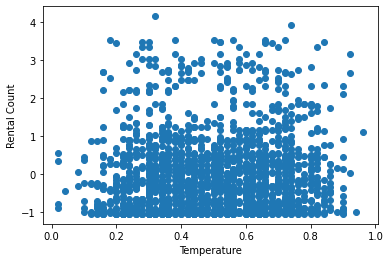

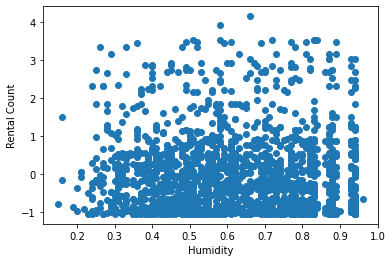

In [ ]:

# Load the dataset
data = sampled_data

# Create a scatter plot of temperature vs rental count
plt.scatter(data['temp'], data['total_count'])
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.show()

# Create a scatter plot of humidity vs rental count
plt.scatter(data['humidity'], data['total_count'])
plt.xlabel('Humidity')
plt.ylabel('Rental Count')
plt.show()


In [ ]:
# Compute the correlation coefficient between temperature and rental count
temp_corr = data['temp'].corr(data['total_count'])
print("Correlation coefficient between temperature and rental count:", temp_corr)

# Compute the correlation coefficient between humidity and rental count
hum_corr = data['humidity'].corr(data['total_count'])
print("Correlation coefficient between humidity and rental count:", hum_corr)


Correlation coefficient between temperature and rental count: 0.045114259707985466
Correlation coefficient between humidity and rental count: -0.01158164290090647


In [ ]:
# Connecting to google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
DATA_PATH = '/content/gdrive/MyDrive/Advanced_Regression/hour.csv'  

# the link to my drive: https://drive.google.com/drive/folders/1ZSbcRA48AqQRC-1e8ELEiiqlrgNAeqx6?usp=share_link

In [ ]:
data = pd.read_csv(DATA_PATH, sep=',') 

In [ ]:
# Compute the correlation coefficient between temperature and rental count
data = data
temp_corr = data['temp'].corr(data['cnt'])
print("Correlation coefficient between temperature and rental count:", temp_corr)

# Compute the correlation coefficient between humidity and rental count
hum_corr = data['hum'].corr(data['cnt'])
print("Correlation coefficient between humidity and rental count:", hum_corr)

Correlation coefficient between temperature and rental count: 0.4047722757786588
Correlation coefficient between humidity and rental count: -0.3229107408245603


In the previous step I counted the correlation among elements of 'raw' data. 

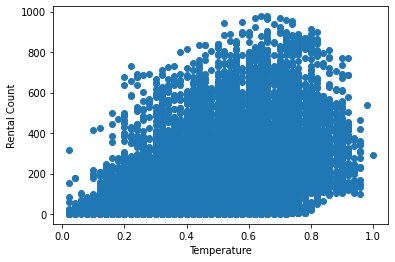

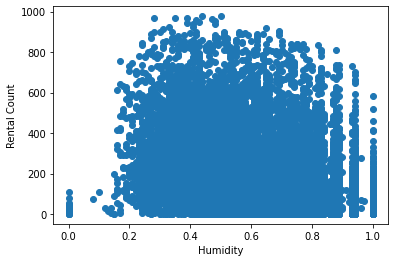

In [ ]:
# Load the dataset


# Create a scatter plot of temperature vs rental count
plt.scatter(data['temp'], data['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.show()

# Create a scatter plot of humidity vs rental count
plt.scatter(data['hum'], data['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Rental Count')
plt.show()

# 9. What is more important: current season or current hour, temperature or feeling temperature? Why? 

In [ ]:
# Using the original dataset


# Load the data into a Pandas DataFrame
df = data

# Calculate the correlation coefficients
correlations = df.corr()['cnt']

# Print the results
print(correlations)


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


In [ ]:
# Using the preprocessed, standardised dataset

# Load the data into a Pandas DataFrame
df = sampled_data

# Calculate the correlation coefficients
correlations = df.corr()['total_count']

# Print the results
print(correlations)

year                   0.029024
month                  0.023403
hr                     0.157711
holiday               -0.038594
workingday             0.029594
temp                   0.045114
atemp                  0.048473
humidity              -0.011582
windspeed             -0.008423
casual                 0.038865
registered             0.132729
total_count            1.000000
season_1              -0.040715
season_2               0.036819
season_3              -0.027618
season_4               0.030753
weather_condition_1   -0.024301
weather_condition_2    0.050099
weather_condition_3   -0.035788
weather_condition_4   -0.006317
weekday_0             -0.043108
weekday_1             -0.037300
weekday_2              0.050470
weekday_3              0.018393
weekday_4              0.000477
weekday_5             -0.013673
weekday_6              0.021502
Name: total_count, dtype: float64
